# IP Network Traffic Flow
### Introductory Information
A <b>flow</b> consists of all traffic that belongs to the same communication context, basically, <b>IP data packets</b> that belongs to the same connection. While IP is completely packet based and has no nortion of connection, chances are applications that communicate with each other using IP will exchange in general more than one packet when they start communicating.

For example, a file transfer application breaks the file to be transferred into several individual packets. All packets are for the same transfer and need to be delivered over a network and may "flow" over the same router. The same applies for an image that is to be transfered for viewing a web page or a Voice over IP conversation carried out between two users. This way, when a router sees one packet passing over from one point to a certain destination, chances are there may be more coming . A flow ,may as well consist of only a single packet transfer.

<b>Statistical information</b> about IP-based data traffic that "flows" over a <b>router</b> is communicated by <b>Netflow</b>. The statistics are provided on a per-flow basis.

A flow is uniquely identified by the following pieces of information

 - <b>Source Address</b>
 - <b>Source Port</b>
 - <b>Destination Address</b>
 - <b>Destination Port</b>
 - <b>Protocol type</b> (for example whether the packet carries TCP or UDP)
 - <b>Input logic Interface</b> (identified by the same index that is used for the interface in SNMP MIBs; this is needed      because, in addition to the source address and port, in the case of <b>private networks with private IP address         spaces</b>, the    other pieces of information might not be unique to one flow)
 - Knowing how much traffic of what type was sent at what time from where to where allows network managers to account for      detailed network use by individual users. This is important if a network provider wants to charge based on actual          traffic consumption instead of charging simply a flat access fee.
   As traffic flows across multiple routers, the network provider must be sure to avoid double-counting the same traffic on    multiple counters. This can be ensured by correlating flow records that are collected on multiple routers, or by taking    into account only the flow records generated by the access router through which a particular user is known to connect to    the rest of the network
 - It provides a wealth of data for traffic analysis, bottleneck, and network planning.
 - It can provide an invaluable tool to spot and defend against attacks on a network that carry certain characteristics in    terms of the traffic patterns they generate.
 

### Data
The dataset is based on <b>IP Network Flows labelled by 75 apps</b>. It was collected in a network section from Universidad Del Cauca, Popayán, Colombia by performing <b>packet captures</b> at different hours during morning and afternoon for six days. A total of 3577296 instances were collected and stored in a csv file.

#### Content of the Dataset
The dataset contains 87 features. Each instance contains information of an IP flow generated by a network device, i.e., <b>source and destination IP address, ports, interarrival times, layer 7 protocol (application)</b> used on that flow as the class e.t.c.  

From this data, a <b>Machine Learning model</b> aimed at <b>predicting protocol name</b> will be created, trained and evaluated for performance. The dataset will be thoroughly cleaned to ensure high accuracy and great performance of the model on new data.

### Exploratory Data Analysis

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import f1_score

In [2]:
# importing algorithms
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, ConfusionMatrixDisplay,classification_report
from sklearn.decomposition import PCA
from sklearn.model_selection import KFold
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_curve, roc_auc_score

sc = StandardScaler()

In [3]:
# Show all columns no matter how many
pd.set_option("display.max_columns", None)
# pd.set_option("display.max_rows", None)

In [4]:
# load dataset
dataset = pd.read_csv("Dataset-Unicauca-Version2-87Atts.csv")

In [5]:
# create dataframe and display top 5 rows of the dataset
df = pd.DataFrame(dataset)
df.head()

,Flow.ID,Source.IP,Source.Port,Destination.IP,Destination.Port,Protocol,Timestamp,Flow.Duration,Total.Fwd.Packets,Total.Backward.Packets,Total.Length.of.Fwd.Packets,Total.Length.of.Bwd.Packets,Fwd.Packet.Length.Max,Fwd.Packet.Length.Min,Fwd.Packet.Length.Mean,Fwd.Packet.Length.Std,Bwd.Packet.Length.Max,Bwd.Packet.Length.Min,Bwd.Packet.Length.Mean,Bwd.Packet.Length.Std,Flow.Bytes.s,Flow.Packets.s,Flow.IAT.Mean,Flow.IAT.Std,Flow.IAT.Max,Flow.IAT.Min,Fwd.IAT.Total,Fwd.IAT.Mean,Fwd.IAT.Std,Fwd.IAT.Max,Fwd.IAT.Min,Bwd.IAT.Total,Bwd.IAT.Mean,Bwd.IAT.Std,Bwd.IAT.Max,Bwd.IAT.Min,Fwd.PSH.Flags,Bwd.PSH.Flags,Fwd.URG.Flags,Bwd.URG.Flags,Fwd.Header.Length,Bwd.Header.Length,Fwd.Packets.s,Bwd.Packets.s,Min.Packet.Length,Max.Packet.Length,Packet.Length.Mean,Packet.Length.Std,Packet.Length.Variance,FIN.Flag.Count,SYN.Flag.Count,RST.Flag.Count,PSH.Flag.Count,ACK.Flag.Count,URG.Flag.Count,CWE.Flag.Count,ECE.Flag.Count,Down.Up.Ratio,Average.Packet.Size,Avg.Fwd.Segment.Size,Avg.Bwd.Segment.Size,Fwd.Header.Length.1,Fwd.Avg.Bytes.Bulk,Fwd.Avg.Packets.Bulk,Fwd.Avg.Bulk.Rate,Bwd.Avg.Bytes.Bulk,Bwd.Avg.Packets.Bulk,Bwd.Avg.Bulk.Rate,Subflow.Fwd.Packets,Subflow.Fwd.Bytes,Subflow.Bwd.Packets,Subflow.Bwd.Bytes,Init_Win_bytes_forward,Init_Win_bytes_backward,act_data_pkt_fwd,min_seg_size_forward,Active.Mean,Active.Std,Active.Max,Active.Min,Idle.Mean,Idle.Std,Idle.Max,Idle.Min,Label,L7Protocol,ProtocolName
0,172.19.1.46-10.200.7.7-52422-3128-6,172.19.1.46,52422,10.200.7.7,3128,6,26/04/201711:11:17,45523,22,55,132,110414.0,6,6,6.000000,0.000000,4380,1187,2007.527273,768.481689,2.428355e+06,1.691453e+03,598.986842,816.061346,3880.0,1,45523.0,2167.761905,1319.384512,5988.0,698.0,41178.0,762.555556,1230.348220,5133.0,1.0,0,0,0,0,440,1100,4.832722e+02,1208.180480,6,4380,1417.333333,1121.579194,1.257940e+06,0,0,0,0,1,0,0,0,2,1435.74026,6.000000,2007.527273,440,0,0,0,0,0,0,22,132,55,110414,256,490,21,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN,131,HTTP_PROXY
1,172.19.1.46-10.200.7.7-52422-3128-6,10.200.7.7,3128,172.19.1.46,52422,6,26/04/201711:11:17,1,2,0,12,0.0,6,6,6.000000,0.000000,0,0,0.000000,0.000000,1.200000e+07,2.000000e+06,1.000000,0.000000,1.0,1,1.0,1.000000,0.000000,1.0,1.0,0.0,0.000000,0.000000,0.0,0.0,0,0,0,0,40,0,2.000000e+06,0.000000,6,6,6.000000,0.000000,0.000000e+00,0,0,0,0,1,1,0,0,0,9.00000,6.000000,0.000000,40,0,0,0,0,0,0,2,12,0,0,490,-1,1,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN,131,HTTP_PROXY
2,10.200.7.217-50.31.185.39-38848-80-6,50.31.185.39,80,10.200.7.217,38848,6,26/04/201711:11:17,1,3,0,674,0.0,337,0,224.666667,194.567041,0,0,0.000000,0.000000,6.740000e+08,3.000000e+06,0.500000,0.707107,1.0,0,1.0,0.500000,0.707107,1.0,0.0,0.0,0.000000,0.000000,0.0,0.0,1,0,0,0,96,0,3.000000e+06,0.000000,0,337,252.750000,168.500000,2.839225e+04,0,1,0,0,1,0,0,0,0,337.00000,224.666667,0.000000,96,0,0,0,0,0,0,3,674,0,0,888,-1,1,32,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN,7,HTTP
3,10.200.7.217-50.31.185.39-38848-80-6,50.31.185.39,80,10.200.7.217,38848,6,26/04/201711:11:17,217,1,3,0,0.0,0,0,0.000000,0.000000,0,0,0.000000,0.000000,0.000000e+00,1.843318e+04,72.333333,62.660461,110.0,0,0.0,0.000000,0.000000,0.0,0.0,107.0,53.500000,75.660426,107.0,0.0,0,0,0,0,32,96,4.608295e+03,13824.884793,0,0,0.000000,0.000000,0.000000e+00,0,0,0,0,1,1,0,0,3,0.00000,0.000000,0.000000,32,0,0,0,0,0,0,1,0,3,0,888,490,0,32,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN,7,HTTP
4,192.168.72.43-10.200.7.7-55961-3128-6,192.168.72.43,55961,10.200.7.7,3128,6,26/04/201711:11:17,78068,5,0,1076,0.0,529,6,215.200000,286.458898,0,0,0.000000,0.000000,1.378286e+04,6.404673e+01,19517.000000,25758.502350,54313.0,0,78068.0,19517.000000,25758.502350,54313.0,0.0,0.0,0.000000,0.000000,0.0,0.0,1,0,0,0,100,0,6.404673e+01,0.000000,6,529,267.500000,286.458898,8.205870e+04,0,1,0,0,1,0,0,0,0,321.00000,215.200000,0.000000,100,0,0,0,0,0,0,5,1076,0,0,253,-1,4,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN,131,HTTP_PROXY


In [6]:
# The shape of the dataset
print("Number of Rows: {}".format(df.shape[0]))
print("Number of COlumns: {}".format(df.shape[1]))

Number of Rows: 3577296
Number of COlumns: 87


In [7]:
# save figures as png images
from pathlib import Path
import matplotlib.pyplot as plt

IMAGES_PATH = Path() / "images"/ "end_to_end_projects/"
IMAGES_PATH.mkdir(parents=True, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = IMAGES_PATH / f"{fig_id}.{fig_extension}"
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

### Under Sampling

Number of Unique Application Names:  78


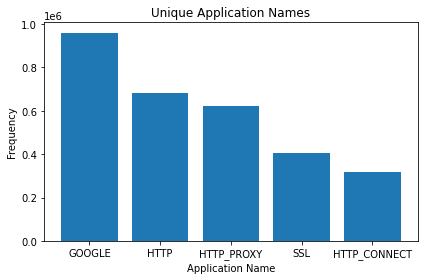

In [8]:
# Graph of ProtocolName and Frequency
freq_protocol = df["ProtocolName"].value_counts()
application_name = []
frequency_count = []
for key, value in freq_protocol.items():
    application_name.append(key)
    frequency_count.append(value)

print("Number of Unique Application Names: ", len(freq_protocol))

# graph of top 5 application names
top_values = 5
plt.bar(application_name[:top_values], frequency_count[:top_values])
plt.xlabel("Application Name")
plt.ylabel("Frequency")
plt.title("Unique Application Names")
save_fig("frequent_application_names")
plt.show()

In [9]:
# filtering the classes which have more than 10000 rows (occurrences)

requiredProtocolName = []
for key, value in freq_protocol.items():
    if (value >= 10000):
        requiredProtocolName.append(key)

print(requiredProtocolName)

['GOOGLE', 'HTTP', 'HTTP_PROXY', 'SSL', 'HTTP_CONNECT', 'YOUTUBE', 'AMAZON', 'MICROSOFT', 'GMAIL', 'WINDOWS_UPDATE', 'SKYPE', 'FACEBOOK', 'DROPBOX', 'YAHOO', 'TWITTER', 'CLOUDFLARE', 'MSN']


In [10]:
# taking the random 10000 data from the requiredProtoclName and
# forming the dataset
listofDataFrames = []
for protocol in requiredProtocolName:
    listofDataFrames.append(pd.DataFrame(df[df["ProtocolName"] == protocol].sample(n = 10000)))
sampledData = pd.concat(listofDataFrames)
sampledData.shape

(170000, 87)

In [11]:
# taking random rows and shuffling the dataframe
data = sampledData.sample(frac=1, random_state=1).reset_index()

# remove the rows that contains Null values
data.dropna(inplace=True)
data.dropna(axis='columns')
data.reset_index(drop=True, inplace=True)

# remove columns which contains zeroes in the data
data = data.loc[:, (data != 0).any(axis=0)]

In [12]:
print("Shape after removing rows with Null values")
print("Number of Rows: {}".format(data.shape[0]))
print("Number of Columns: {}".format(data.shape[1]))

Shape after removing rows with Null values
Number of Rows: 170000
Number of Columns: 78


Given that the number of rows remains the same (170000) even after trying to remove those with null values indicates that there are no null values in the dataset

In [13]:
# ProtocolName feature (our taget column) is categorical, let's 
# convert it to a required format(int).
# LabelEncoder will work well here
encoder = LabelEncoder().fit (data["ProtocolName"])
data["ProtocolName"] = encoder.transform(data["ProtocolName"])
values = encoder.inverse_transform(data["ProtocolName"])
target_column = data["ProtocolName"]

# mapping the encoded value
encoded_target_column = {}
for i in range(len(data["ProtocolName"])):
    encoded_target_column[data["ProtocolName"][i]] = values[i]
print(encoded_target_column)

{2: 'DROPBOX', 15: 'YAHOO', 13: 'TWITTER', 12: 'SSL', 4: 'GMAIL', 1: 'CLOUDFLARE', 3: 'FACEBOOK', 0: 'AMAZON', 8: 'HTTP_PROXY', 10: 'MSN', 7: 'HTTP_CONNECT', 11: 'SKYPE', 9: 'MICROSOFT', 5: 'GOOGLE', 6: 'HTTP', 14: 'WINDOWS_UPDATE', 16: 'YOUTUBE'}


In [14]:
# here are the column heads
data.columns

Index(['index', 'Flow.ID', 'Source.IP', 'Source.Port', 'Destination.IP',
       'Destination.Port', 'Protocol', 'Timestamp', 'Flow.Duration',
       'Total.Fwd.Packets', 'Total.Backward.Packets',
       'Total.Length.of.Fwd.Packets', 'Total.Length.of.Bwd.Packets',
       'Fwd.Packet.Length.Max', 'Fwd.Packet.Length.Min',
       'Fwd.Packet.Length.Mean', 'Fwd.Packet.Length.Std',
       'Bwd.Packet.Length.Max', 'Bwd.Packet.Length.Min',
       'Bwd.Packet.Length.Mean', 'Bwd.Packet.Length.Std', 'Flow.Bytes.s',
       'Flow.Packets.s', 'Flow.IAT.Mean', 'Flow.IAT.Std', 'Flow.IAT.Max',
       'Flow.IAT.Min', 'Fwd.IAT.Total', 'Fwd.IAT.Mean', 'Fwd.IAT.Std',
       'Fwd.IAT.Max', 'Fwd.IAT.Min', 'Bwd.IAT.Total', 'Bwd.IAT.Mean',
       'Bwd.IAT.Std', 'Bwd.IAT.Max', 'Bwd.IAT.Min', 'Fwd.PSH.Flags',
       'Fwd.Header.Length', 'Bwd.Header.Length', 'Fwd.Packets.s',
       'Bwd.Packets.s', 'Min.Packet.Length', 'Max.Packet.Length',
       'Packet.Length.Mean', 'Packet.Length.Std', 'Packet.Length.Variance

In [15]:
# removing more columns that are not usefull for finding correlation
dataset = data.drop(["Flow.ID", "Source.IP", "Label", "Timestamp",
                    "Destination.IP", "Source.Port", "Destination.Port",
                     "Protocol"], axis=1)
x_dataset = dataset.drop(["ProtocolName"], axis=1)
y_dataset = dataset["ProtocolName"]

# normal dataset
X_train, X_test, y_train, y_test = train_test_split(x_dataset, y_dataset, test_size=0.2)
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

### Correlation Matrix

In [16]:
# finding the corrrelation matrix
correlation_matrix = dataset.corr()
correlation_matrix.head()

,index,Flow.Duration,Total.Fwd.Packets,Total.Backward.Packets,Total.Length.of.Fwd.Packets,Total.Length.of.Bwd.Packets,Fwd.Packet.Length.Max,Fwd.Packet.Length.Min,Fwd.Packet.Length.Mean,Fwd.Packet.Length.Std,Bwd.Packet.Length.Max,Bwd.Packet.Length.Min,Bwd.Packet.Length.Mean,Bwd.Packet.Length.Std,Flow.Bytes.s,Flow.Packets.s,Flow.IAT.Mean,Flow.IAT.Std,Flow.IAT.Max,Flow.IAT.Min,Fwd.IAT.Total,Fwd.IAT.Mean,Fwd.IAT.Std,Fwd.IAT.Max,Fwd.IAT.Min,Bwd.IAT.Total,Bwd.IAT.Mean,Bwd.IAT.Std,Bwd.IAT.Max,Bwd.IAT.Min,Fwd.PSH.Flags,Fwd.Header.Length,Bwd.Header.Length,Fwd.Packets.s,Bwd.Packets.s,Min.Packet.Length,Max.Packet.Length,Packet.Length.Mean,Packet.Length.Std,Packet.Length.Variance,FIN.Flag.Count,SYN.Flag.Count,RST.Flag.Count,PSH.Flag.Count,ACK.Flag.Count,URG.Flag.Count,ECE.Flag.Count,Down.Up.Ratio,Average.Packet.Size,Avg.Fwd.Segment.Size,Avg.Bwd.Segment.Size,Fwd.Header.Length.1,Subflow.Fwd.Packets,Subflow.Fwd.Bytes,Subflow.Bwd.Packets,Subflow.Bwd.Bytes,Init_Win_bytes_forward,Init_Win_bytes_backward,act_data_pkt_fwd,min_seg_size_forward,Active.Mean,Active.Std,Active.Max,Active.Min,Idle.Mean,Idle.Std,Idle.Max,Idle.Min,L7Protocol,ProtocolName
index,1.000000,0.035257,0.003418,0.003373,0.004908,-0.010927,-0.011807,0.010519,0.000736,-0.009974,-0.047716,0.023070,-0.050914,-0.052324,-0.000592,0.014261,0.019407,0.030337,0.019908,-0.008207,0.038168,0.027328,0.029531,0.025188,0.007134,0.045293,0.034456,0.038865,0.036510,0.017617,0.061331,-0.000224,-0.000083,-0.001317,0.049728,-0.001961,-0.046459,-0.052961,-0.050044,-0.063433,-0.029052,0.061331,-0.000637,-0.014014,0.020464,-0.044996,-0.000637,-0.025562,-0.051906,0.000736,-0.050914,-0.000224,0.003418,0.004908,0.003373,-0.010927,-0.026066,-0.035603,0.013842,-0.012843,-0.006676,0.014875,0.001043,-0.013326,0.035774,0.021369,0.037390,0.032844,0.014592,-0.049169
Flow.Duration,0.035257,1.000000,0.084162,0.076919,0.042793,0.059056,0.190967,0.047091,0.180070,0.158930,0.148191,0.204747,0.136238,0.070660,-0.023942,-0.120905,0.477966,0.713259,0.825904,0.013223,0.954757,0.535032,0.667502,0.789758,0.176756,0.897384,0.458726,0.602524,0.748848,0.228004,0.438420,0.079672,0.074987,-0.111802,-0.071810,0.003473,0.175153,0.157330,0.147520,0.075134,-0.057255,0.438420,0.005186,-0.056304,0.060348,-0.351860,0.005186,-0.003904,0.154406,0.180070,0.136238,0.079672,0.084162,0.042793,0.076919,0.059056,-0.008040,0.046571,0.070766,0.015093,0.206313,0.223103,0.267945,0.134822,0.710057,0.475068,0.752353,0.638259,0.044200,-0.090264
Total.Fwd.Packets,0.003418,0.084162,1.000000,0.894530,0.654504,0.626756,0.170432,0.030983,0.095228,0.038547,0.115033,-0.000697,0.081103,0.040567,-0.001715,-0.011110,-0.020903,-0.024178,-0.002696,-0.005594,0.085024,-0.020184,-0.020602,-0.003387,-0.008786,0.090045,-0.015160,-0.016853,0.002907,-0.008162,0.028021,0.976837,0.885461,-0.010262,-0.006633,0.004958,0.164827,0.115556,0.088665,0.087844,-0.005303,0.028021,-0.000344,0.005076,-0.004595,-0.034203,-0.000344,-0.002692,0.111636,0.095228,0.081103,0.976837,1.000000,0.654504,0.894530,0.626756,-0.000023,0.052540,0.752728,0.003227,0.103526,0.057055,0.105620,0.089708,-0.005166,0.007495,-0.002135,-0.007181,0.001252,0.018447
Total.Backward.Packets,0.003373,0.076919,0.894530,1.000000,0.418465,0.769126,0.102805,0.011528,0.046242,0.017174,0.155537,-0.002489,0.107821,0.058112,-0.001680,-0.011237,-0.021530,-0.024758,-0.001419,-0.005700,0.077261,-0.020010,-0.020420,-0.002523,-0.008533,0.085517,-0.015868,-0.017315,0.004729,-0.008481,0.020730,0.868575,0.977838,-0.010462,-0.006472,-0.002878,0.180079,0.136982,0.098734,0.098763,-0.005399,0.020730,-0.000397,0.014530,-0.015070,-0.033911,-0.000397,0.033095,0.132601,0.046242,0.107821,0.868575,0.894530,0.418465,1.000000,0.769126,0.002628,0.045354,0.592752,0.002651,0.086612,0.054215,0.091985,0.072036,-0.005480,0.008502,-0.002237,-0.007769,0.005574,0.024805
Total.Length.of.Fwd.Packets,0.004908,0.042793,0.654504,0.418465,1.000000,0.000873,0.249212,0.051512,0.159811,0.077520,-0.005725,-0.003729,-0.011539,-0.012194,-0.000553,-0.004181,-0.

In [17]:
# Number of features in the correlation matrix
correlation_matrix.shape

(70, 70)

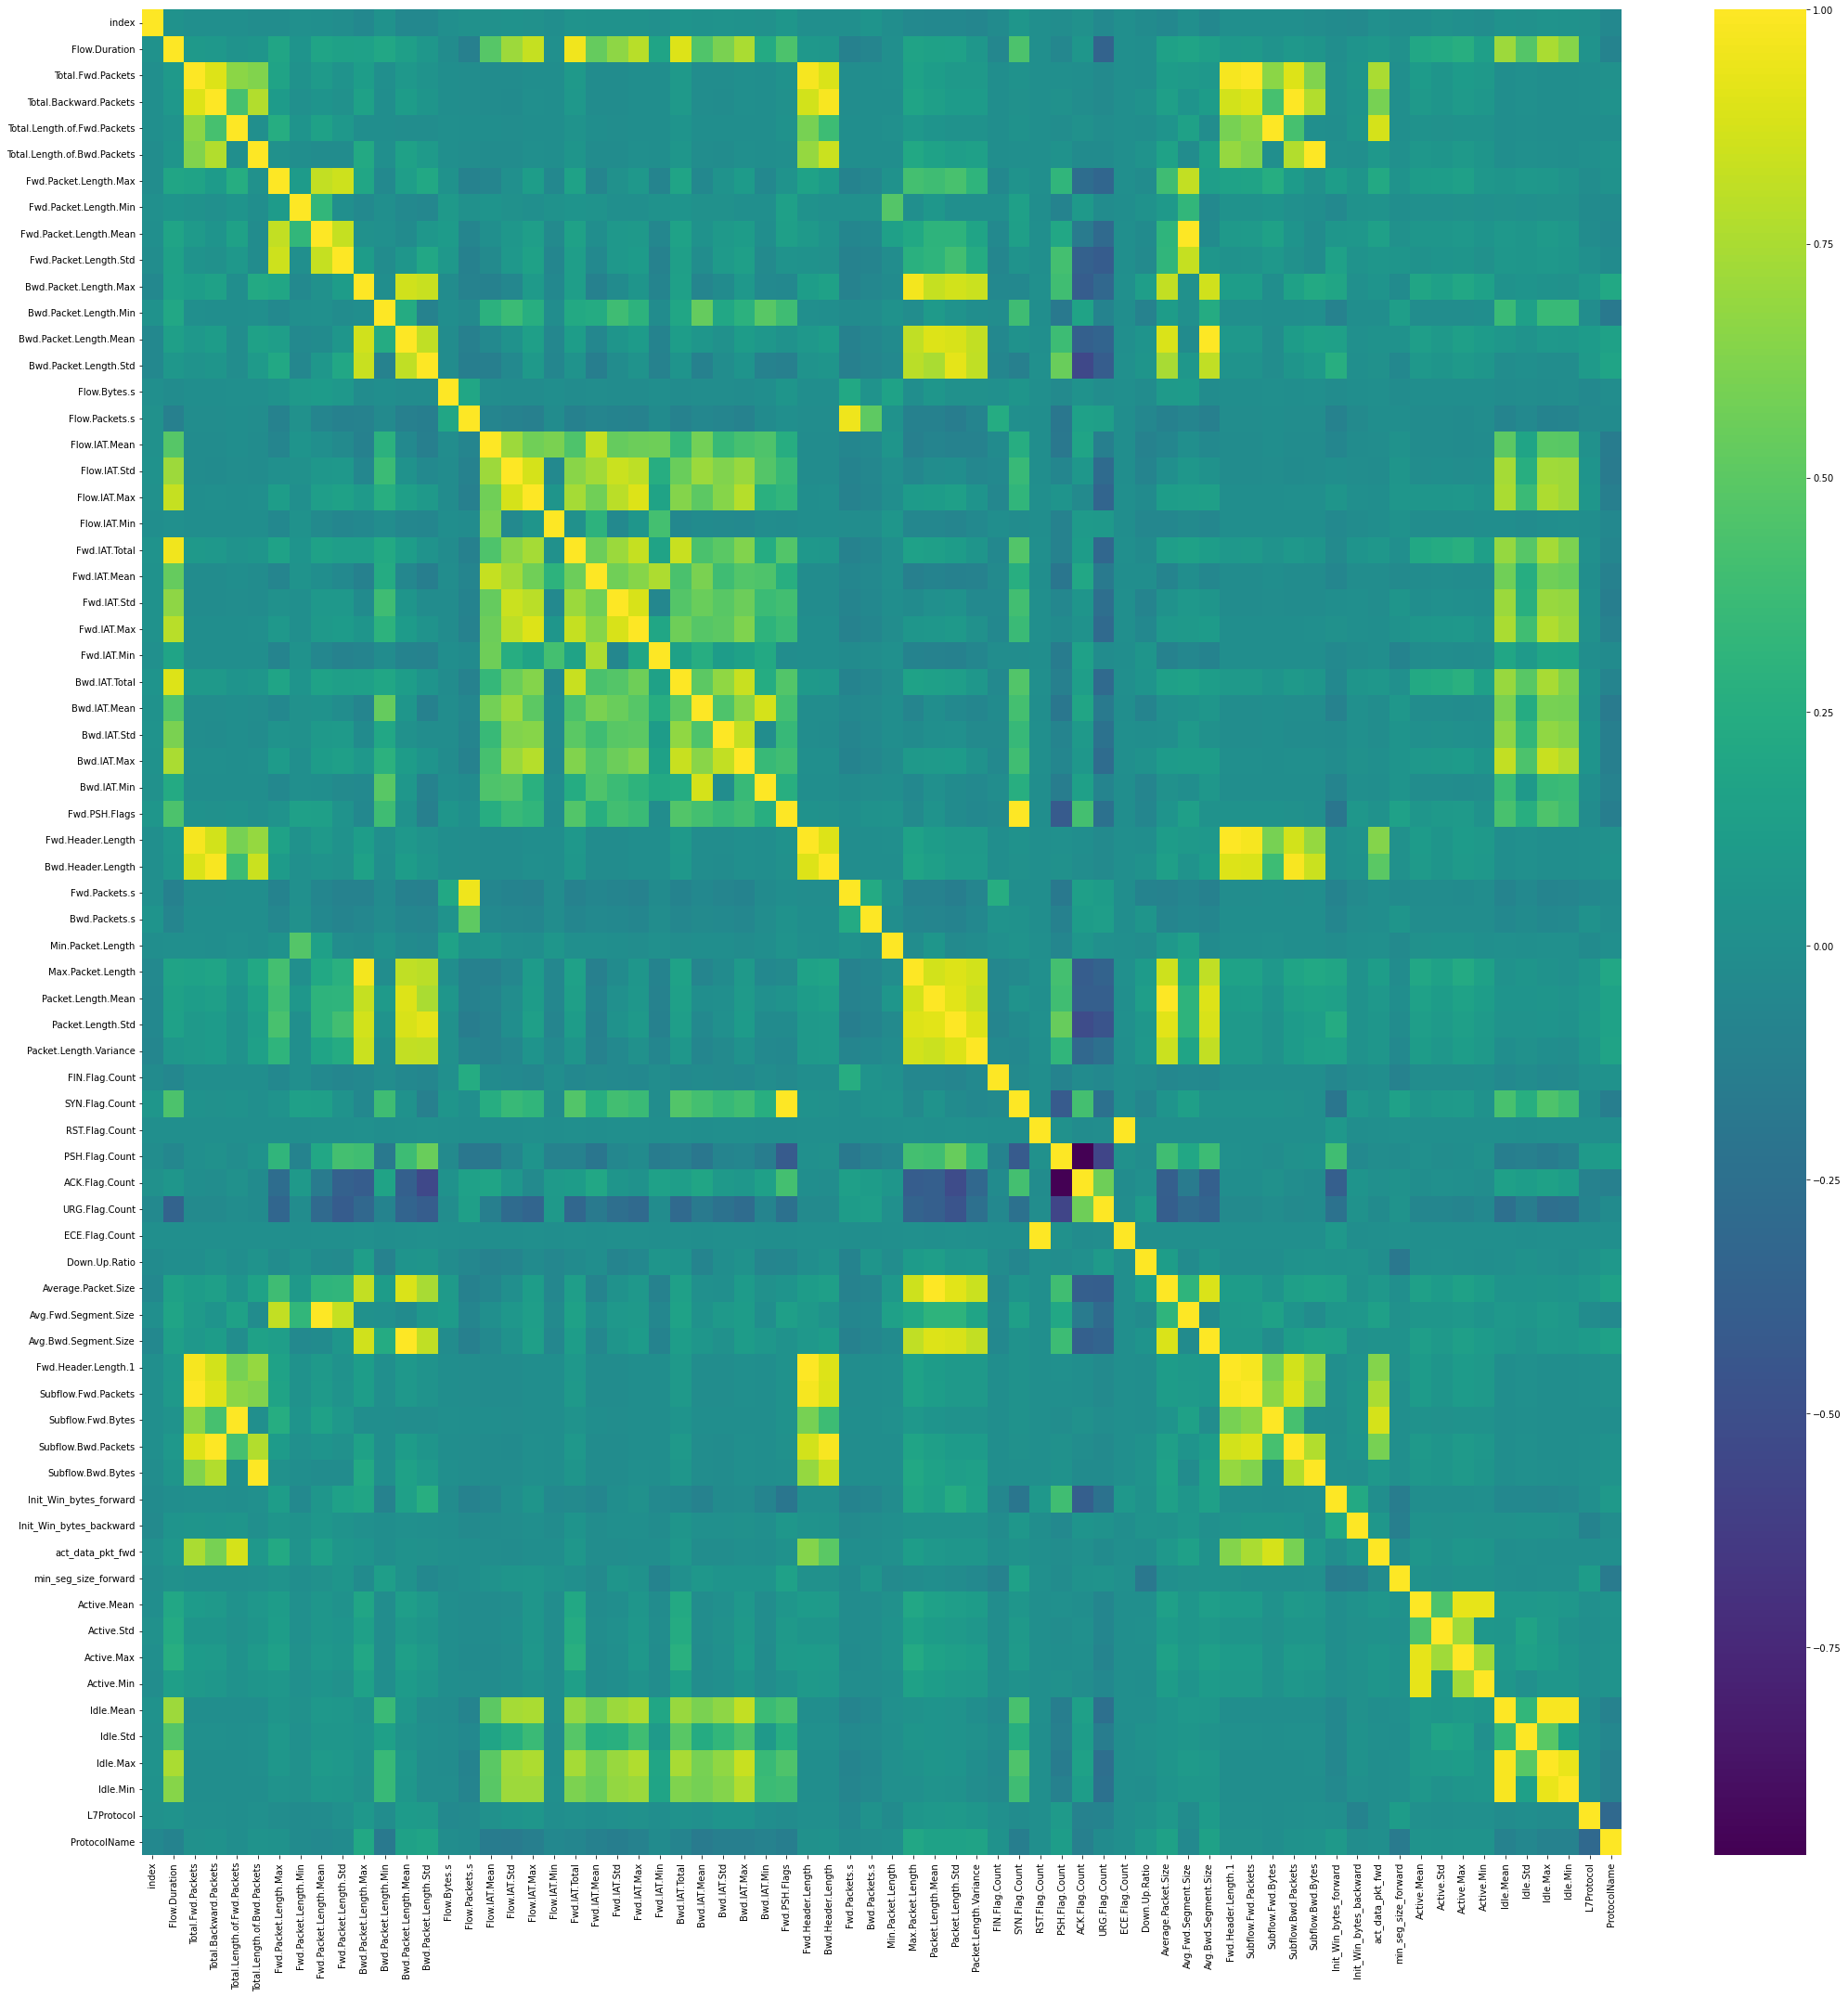

In [18]:
# plotting the heatmap
plt.figure(figsize=(30, 30))
sns.heatmap(correlation_matrix, cmap="viridis")
save_fig("correlation_matrix_heatmap")
plt.show()

### Feature Selection via Correlation Matrix

In [19]:
sorted_corr_matrix_protocolName = correlation_matrix["ProtocolName"].sort_values(ascending=False)
allkeys = list(sorted_corr_matrix_protocolName.keys())

# removing the target column
allkeys.remove("ProtocolName")

feature_map = {}

# removing the features which has less than 0.01 correlation and
# grouping the columns which have same correlation (rounding upto 2 decimal places)
for colName in allkeys:
    correlation = round(sorted_corr_matrix_protocolName[colName], 2)
    if (abs(correlation) >= 0.01):
        if correlation in feature_map:
            feature_map[correlation].append(colName)
        else:
            feature_map[correlation] = [colName]
print("Columns with absolute correlation greater than 0.01 with ProtocolName: \n")
print(feature_map)

Columns with absolute correlation greater than 0.01 with ProtocolName: 

{0.21: ['Bwd.Packet.Length.Max'], 0.2: ['Max.Packet.Length'], 0.18: ['Bwd.Packet.Length.Std'], 0.17: ['Packet.Length.Variance', 'Packet.Length.Mean'], 0.16: ['Packet.Length.Std', 'Avg.Bwd.Segment.Size', 'Bwd.Packet.Length.Mean', 'Average.Packet.Size'], 0.12: ['PSH.Flag.Count'], 0.08: ['Init_Win_bytes_forward', 'Down.Up.Ratio'], 0.04: ['Subflow.Bwd.Bytes', 'Total.Length.of.Bwd.Packets', 'Active.Mean', 'Active.Max', 'Active.Min'], 0.03: ['Fwd.Packet.Length.Max', 'Bwd.Header.Length'], 0.02: ['Total.Backward.Packets', 'Subflow.Bwd.Packets', 'FIN.Flag.Count', 'Active.Std', 'Fwd.Header.Length.1', 'Fwd.Header.Length', 'Subflow.Fwd.Packets', 'Total.Fwd.Packets'], -0.01: ['Subflow.Fwd.Bytes', 'Total.Length.of.Fwd.Packets', 'Init_Win_bytes_backward', 'Flow.Bytes.s'], -0.02: ['Bwd.Packets.s'], -0.03: ['Fwd.IAT.Min', 'Fwd.Packet.Length.Std', 'Fwd.Packet.Length.Min', 'Fwd.Packets.s', 'Flow.Packets.s', 'URG.Flag.Count'], -0.04:

In [20]:
# choosing the random features from same correlated values
final_features = []

import random
# random_columns = []
for correlation, column_list in feature_map.items():
    final_features.append(random.choice(column_list))

print("Number of Features to be Taken: ", len(final_features))
print("Randomly selected columns for each correlation: ")
print(final_features)

pos_value_columns = final_features

Number of Features to be Taken:  28
Randomly selected columns for each correlation: 
['Bwd.Packet.Length.Max', 'Max.Packet.Length', 'Bwd.Packet.Length.Std', 'Packet.Length.Variance', 'Avg.Bwd.Segment.Size', 'PSH.Flag.Count', 'Down.Up.Ratio', 'Active.Min', 'Bwd.Header.Length', 'Fwd.Header.Length.1', 'Flow.Bytes.s', 'Bwd.Packets.s', 'Fwd.Packet.Length.Min', 'Fwd.Packet.Length.Mean', 'Flow.IAT.Min', 'Idle.Std', 'Fwd.IAT.Total', 'Bwd.IAT.Total', 'Flow.Duration', 'Idle.Min', 'Fwd.IAT.Mean', 'ACK.Flag.Count', 'Flow.IAT.Max', 'SYN.Flag.Count', 'Flow.IAT.Mean', 'min_seg_size_forward', 'Bwd.Packet.Length.Min', 'L7Protocol']


In [21]:
# final data which would be used for prediction and spliting
data_for_prediction_featureSelection = data[pos_value_columns]
target_column = data["ProtocolName"]

# spliting the data for feature selection via correlation matrix
feature_train, feature_test, target_train, target_test = train_test_split(data_for_prediction_featureSelection, target_column, test_size=0.2)

sc = StandardScaler()
feature_train = sc.fit_transform(feature_train)
feature_test = sc.transform(feature_test)

data_for_prediction_featureSelection.head()

,Bwd.Packet.Length.Max,Max.Packet.Length,Bwd.Packet.Length.Std,Packet.Length.Variance,Avg.Bwd.Segment.Size,PSH.Flag.Count,Down.Up.Ratio,Active.Min,Bwd.Header.Length,Fwd.Header.Length.1,Flow.Bytes.s,Bwd.Packets.s,Fwd.Packet.Length.Min,Fwd.Packet.Length.Mean,Flow.IAT.Min,Idle.Std,Fwd.IAT.Total,Bwd.IAT.Total,Flow.Duration,Idle.Min,Fwd.IAT.Mean,ACK.Flag.Count,Flow.IAT.Max,SYN.Flag.Count,Flow.IAT.Mean,min_seg_size_forward,Bwd.Packet.Length.Min,L7Protocol
0,691,691,0.000000,81459.906667,691.000000,0,0,90840.0,256,512,64.724771,0.068275,0,128.500000,0,3.371090e+06,117173069.0,117077909.0,117173069,35628427.0,7.811538e+06,1,42366848.0,1,5.094481e+06,32,691,121
1,6,6,0.000000,0.000000,6.000000,0,2,0.0,40,20,44444.444444,4938.271605,6,6.000000,1,0.000000e+00,0.0,1.0,405,0.0,0.000000e+00,1,404.0,0,2.025000e+02,20,6,70
2,156,517,60.668773,22187.641026,35.500000,1,1,0.0,132,132,97.520269,0.575907,0,133.833333,62,0.000000e+00,10418347.0,278063.0,10418347,0.0,2.083669e+06,0,10140173.0,0,9.471225e+05,20,0,120
3,3024,3024,1116.586884,989018.243902,1190.782609,1,1,0.0,752,592,462.345067,0.364301,0,100.111111,0,0.000000e+00,3134158.0,63041859.0,63134663,0.0,1.843622e+05,0,60000505.0,0,1.578367e+06,32,0,121
4,0,6,0.000000,0.000000,0.000000,0,0,0.0,0,60,6355.932203,0.000000,6,6.000000,0,0.000000e+00,2832.0,0.0,2832,0.0,1.416000e+03,1,2832.0,0,1.416000e+03,20,0,120


In [22]:
# standardizing the dataset and spliting the original data
feature_train_std, feature_test_std, target_train_std, target_test_std = train_test_split(x_dataset, y_dataset, test_size=0.2)

sc = StandardScaler()
feature_train_std = sc.fit_transform(feature_train_std)
feature_test_std = sc.transform(feature_test_std)

In [23]:
final_result = {"Random Forest": {"Feature Selection": 0, "PCA": 0, "K-Cross Folding": 0, "Origigan": 0},
               "Logistic Regression": {"Feature Selection": 0, "PCA": 0, "K-Cross Folding": 0, "Original": 0},
               "Decision Tree": {"Feature Selection": 0, "PCA": 0, "K-Cross Folding": 0, "Original": 0}}
f1Scores = {"Random Forest": {"Feature Selection": 0, "PCA": 0, "K-Cross Folding": 0, "Origigan": 0},
               "Logistic Regression": {"Feature Selection": 0, "PCA": 0, "K-Cross Folding": 0, "Original": 0},
               "Decision Tree": {"Feature Selection": 0, "PCA": 0, "K-Cross Folding": 0, "Original": 0}}
numberOfFeatures = {"Random Forest": {"Feature Selection": 0, "PCA": 0, "K-Cross Folding": 0, "Origigan": 0},
               "Logistic Regression": {"Feature Selection": 0, "PCA": 0, "K-Cross Folding": 0, "Original": 0},
               "Decision Tree": {"Feature Selection": 0, "PCA": 0, "K-Cross Folding": 0, "Original": 0}}

### Principal Component Analysis

In [24]:
pca = PCA(n_components=13)
feature_train_pca = pca.fit_transform(feature_train_std)
feature_test_pca = pca.transform(feature_test_std)

print(feature_train_pca.shape, feature_test_pca.shape)

(136000, 13) (34000, 13)


## Implementing ML Algorithms

### Radom Forest Classifier

In [25]:
def random_forest_classifier(feature_train, target_train):
    randomForest = RandomForestClassifier(n_estimators=200)
    randomForest.fit(feature_train, target_train)
    
    return randomForest

#### Original Dataset

In [26]:
# random forest on original dataset
randomForest = random_forest_classifier(X_train, y_train)
predictions = randomForest.predict(X_test)
print("Accuracy with Random Forest on Original Dataset", randomForest.score(X_test, y_test))

final_result["Random Forest"]["Original"] = randomForest.score(X_test, y_test)
f1Scores["Random Forest"]["Original"] = f1_score(y_test, predictions, average='micro')
numberOfFeatures["Random Forest"]["Original"] = X_train.shape[1]

Accuracy with Random Forest on Original Dataset 0.9297647058823529


#### Feature Selection

In [27]:
# random forest on feature selection via correlation matrix data
randomForest = random_forest_classifier(feature_train, target_train)
predictions = randomForest.predict(feature_test)
print("Accuracy with Random Forest on Feature Selection via Correlation Matrix", randomForest.score(feature_test, target_test))

final_result["Random Forest"]["Feature Selection"] = randomForest.score(feature_test, target_test)
f1Scores["Random Forest"]["Feature Selection"] = f1_score(y_test, predictions, average="micro")
numberOfFeatures["Random Forest"]["Feature Selection"] = feature_train.shape[1]


Accuracy with Random Forest on Feature Selection via Correlation Matrix 0.9775


#### PCA

In [28]:
# random forest on PCA
randomForest = random_forest_classifier(feature_train_pca, target_train_std)
predictions = randomForest.predict(feature_test_pca)
print("Accuracy with Random Forest on PCA", randomForest.score(feature_test_pca, target_test_std))

final_result["Random Forest"]["PCA"] = randomForest.score(feature_test_pca, target_test_std)
f1Scores["Random Forest"]["PCA"] = f1_score(y_test, predictions, average="micro")
numberOfFeatures["Random Forest"]["PCA"] = feature_train_pca.shape[1]


Accuracy with Random Forest on PCA 0.6913529411764706


#### K Cross Folding

In [29]:
# random forest on k cross folding
rfKcross = RandomForestClassifier(n_estimators=100, random_state=42)

# Initialize k-fold cross-validation
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

# Initialize empty lists to store the accuracy scores for each fold
accuracy_scores = []
f1_scores = []

# Iterate through each fold
for train_index, test_index in kfold.split(x_dataset):
    # split the data into training and testing sets for this fold
    X_train, X_test = x_dataset.iloc[train_index], x_dataset.iloc[test_index]
    y_train, y_test = y_dataset.iloc[train_index], y_dataset.iloc[test_index]
    
    # Fit the random forest classifier to the training data
    rfKcross.fit(X_train, y_train)
    
    # Evaluate the model on the testing data and store the accuracy score
    accuracy_scores.append(rfKcross.score(X_test, y_test))
    f1_scores.append(f1_score(y_test, rfKcross.predict(X_test), average="micro"))
    print(rfKcross.score(X_test, y_test))
    
    # Calculate and print the mean accuracy score accross all folds
    print("Mean Accuracy: ", sum(accuracy_scores)/len(accuracy_scores))
    final_result["Random Forest"]["K-Cross Folding"] = sum(accuracy_scores)/len(accuracy_scores)
    f1Scores["Random Forest"]["K-Cross Folding"] = sum(f1_scores)/len(f1_scores)
    numberOfFeatures["Random Forest"]["K-Cross Folding"] = x_dataset.shape[1]
    

0.9453529411764706
Mean Accuracy:  0.9453529411764706
0.945764705882353
Mean Accuracy:  0.9455588235294118
0.9458235294117647
Mean Accuracy:  0.9456470588235294
0.9451470588235295
Mean Accuracy:  0.9455220588235295
0.9418235294117647
Mean Accuracy:  0.9447823529411765


### Logistic Regression

In [30]:
def logistic_regression(feature_train, target_train):
    classifier = LogisticRegression(random_state = 0, solver="lbfgs", max_iter=100)
    classifier.fit(feature_train, target_train)
    
    return classifier

#### Original Dataset

In [31]:
# Logistic regression on original dataset
logisticRegressionOriginal = logistic_regression(X_train, y_train)
target_pred = logisticRegressionOriginal.predict(X_test)

print("Accuracy in Logistic Regression on Original Dataset", logisticRegressionOriginal.score(X_test, y_test))

final_result["Logistic Regression"]["Original"] = logisticRegressionOriginal.score(X_test, y_test)
f1Scores["Logistic Regression"]["Original"] = f1_score(y_test, predictions, average="micro")
numberOfFeatures["Logistic Regression"]["Original"] = X_train.shape[1]


Accuracy in Logistic Regression on Original Dataset 0.18052941176470588


C:\Users\ojare\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


#### Feature Selection

In [32]:
# logistic regression on feature selction via correlation matrix data
logisticRegressionFeatureSelection = logistic_regression(feature_train, target_train)
target_pred = logisticRegressionFeatureSelection.predict(feature_test)

print("Accuracy in Logistic Regression on Feature Selection via Correlation Matrix", logisticRegressionFeatureSelection.score(feature_test, target_test))

final_result["Logistic Regression"]["Feature Selection"] = logisticRegressionFeatureSelection.score(feature_test, target_test)
f1Scores["Logistic Regression"]["Feature Selection"] = f1_score(y_test, predictions, average="micro")
numberOfFeatures["Logistic Regression"]["Fearure Selection"] = feature_train.shape[1]


C:\Users\ojare\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy in Logistic Regression on Feature Selection via Correlation Matrix 0.7831176470588235


#### PCA

In [33]:
# logistic regression on PCA
logisticRegressionPCA = logistic_regression(feature_train_pca, target_train_std)
target_pred = logisticRegressionPCA.predict(feature_test_pca)

print("Accuracy in logistic Regression on PCA", logisticRegressionPCA.score(feature_test_pca, target_test_std))

final_result["Logistic Regression"]["PCA"] = logisticRegressionPCA.score(feature_test_pca, target_test_std)
f1Scores["Logistic Regression"]["PCA"] = f1_score(y_test,predictions, average="micro")
numberOfFeatures["Logistic Regression"]["PCA"] = feature_train_pca.shape[1]


Accuracy in logistic Regression on PCA 0.28497058823529414


C:\Users\ojare\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


#### K Cross Folding

In [34]:
# logistic regression on k cross folding
kCrossLogisticRegression = LogisticRegression()
kflod = KFold(n_splits=5, shuffle=True)

accuracy_scores = []
f1_scores = []

for train_index, test_index in kfold.split(x_dataset):
    # Split the data into training and testing sets for this fold
    X_train, X_test = x_dataset.iloc[train_index], x_dataset.iloc[test_index]
    y_train, y_test = y_dataset.iloc[train_index], y_dataset.iloc[test_index]
    
    # Fit logistic regression classifier to the training data
    kCrossLogisticRegression.fit(X_train, y_train)
    
    # Evaluate the model on the testing data and store the accuracy score
    accuracy_scores.append(kCrossLogisticRegression.score(X_test, y_test))
    f1_scores.append(f1_score(y_test, kCrossLogisticRegression.predict(X_test), average="micro"))
    print(kCrossLogisticRegression.score(X_test, y_test))
    
# Calculate and print the mean acuracy score across all folds
print("Mean accuracy:", sum(accuracy_scores)/len(accuracy_scores))
final_result["Logistic Regression"]["K-Cross Folding"] = sum(accuracy_scores)/len(accuracy_scores)
f1Scores["Logistic Regression"]["K-Cross Folding"] = sum(f1_scores)/len(f1_scores)
numberOfFeatures["Logistic Regression"]["K-Cross Folding"] = x_dataset.shape[1]


C:\Users\ojare\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.18085294117647058


C:\Users\ojare\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.18623529411764705


C:\Users\ojare\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.18735294117647058


C:\Users\ojare\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.18461764705882353
0.18052941176470588
Mean accuracy: 0.18391764705882352


C:\Users\ojare\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### Decision Tree

#### Original Data

In [35]:
# decision tree on normal data
decisionTreeNormal = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=42)
decisionTreeNormal.fit(X_train, y_train)
target_pred = decisionTreeNormal.predict(X_test)
accuracy = decisionTreeNormal.score(X_test, y_test)
print("Accuracy in Decision Tree on Original Dataset:", accuracy)
final_result["Decision Tree"]["Original"] = accuracy
f1Scores["Decision Tree"]["Original"] = f1_score(y_test, predictions, average="micro")
numberOfFeatures["Decision Tree"]["Original"] = X_train.shape[1]


Accuracy in Decision Tree on Original Dataset: 0.4642352941176471


#### Feature Selection

In [37]:
# decision tree on feature selection
decisionTreeFeatureSelection = DecisionTreeClassifier(criterion="entropy", max_depth=3, random_state=42)
decisionTreeFeatureSelection.fit(feature_train, target_train)
target_pred = decisionTreeFeatureSelection.predict(feature_test)
accuracy = decisionTreeFeatureSelection.score(feature_test, target_test)
print("Accuracy in Decision Tree on Normal:", accuracy)
final_result["Decision Tree"]["Feature Selection"] = accuracy
f1Scores["Decision Tree"]["Feature Selection"] = f1_score(y_test, predictions, average="micro")
numberOfFeatures["Decision Tree"]["Feature Selection"] = feature_train.shape[1]


Accuracy in Decision Tree on Normal: 0.4643529411764706


#### PCA

In [39]:
# decision tree on PCA
decisionTreePCA = DecisionTreeClassifier(criterion="entropy", max_depth=3, random_state=42)
decisionTreePCA.fit(feature_train_pca, target_train_std)
target_pred = decisionTreePCA.predict(feature_test_pca)
accuracy = decisionTreePCA.score(feature_test_pca, target_test_std)
print("Accuracy in Decision Tree on PCA:", accuracy)
final_result["Decision Tree"]["PCA"] = accuracy
f1Scores["Decision Tree"]["PCA"] = f1_score(y_test, predictions, average="micro")
numberOfFeatures['Decision Tree']["PCA"] = feature_train_pca.shape[1]


Accuracy in Decision Tree on PCA: 0.19041176470588236


#### K Cross Folding

In [42]:
# decision tree on K Cross folding
decisionTreeNormal = DecisionTreeClassifier(criterion="entropy", max_depth=3, random_state=42)
kfold = KFold(n_splits=5, shuffle=True, random_state=42)
accuracy_scores = []
f1_scores = []
for train_index, test_index in kfold.split(x_dataset):
    X_train, X_test = x_dataset.iloc[train_index], x_dataset.iloc[test_index]
    y_train, y_test = y_dataset.iloc[train_index], y_dataset.iloc[test_index]
    decisionTreeNormal.fit(X_train, y_train)
    accuracy_scores.append(decisionTreeNormal.score(X_test, y_test))
    f1_scores.append(f1_score(y_test, decisionTreeNormal.predict(X_test), average="micro"))
    print(decisionTreeNormal.score(X_test, y_test))
    
# Calculate and print the mean accuracy score across all folds
print("Mean accuracy:", sum(accuracy_scores)/len(accuracy_scores))
final_result["Decision Tree"]["K-Cross Folding"] = sum(accuracy_scores)/len(accuracy_scores)
f1Scores["Decision Tree"]["K-Cross Folding"] = sum(f1_scores)/ len(f1_scores)
numberOfFeatures["Decision Tree"]["K-Cross Folding"] = x_dataset.shape[1]


0.4641176470588235
0.46247058823529413
0.46338235294117647
0.4673529411764706
0.4642352941176471
Mean accuracy: 0.46431176470588237


In [43]:
accuracy_df = pd.DataFrame(final_result)
print("Accuracy for each model for particular algorithm")
accuracy_df

Accuracy for each model for particular algorithm


,Random Forest,Logistic Regression,Decision Tree
Feature Selection,0.977500,0.783118,0.464353
PCA,0.691353,0.284971,0.190412
K-Cross Folding,0.944782,0.183918,0.464312
Origigan,0.000000,NaN,NaN
Original,0.929765,0.180529,0.464235


In [44]:
f1Score_df = pd.DataFrame(f1Scores)
print("F1 Scores for each model for particular algorithm")
f1Score_df

F1 Scores for each model for particular algorithm


,Random Forest,Logistic Regression,Decision Tree
Feature Selection,0.059971,0.060147,0.060147
PCA,0.058118,0.060147,0.060147
K-Cross Folding,0.944782,0.183918,0.464312
Origigan,0.000000,NaN,NaN
Original,0.929765,0.060147,0.060147


In [45]:
features_df = pd.DataFrame(numberOfFeatures)
print("Number of Features for each model and algorithm")
features_df

Number of Features for each model and algorithm


,Random Forest,Logistic Regression,Decision Tree
Feature Selection,28.0,0.0,28.0
PCA,13.0,13.0,13.0
K-Cross Folding,69.0,69.0,69.0
Origigan,0.0,NaN,NaN
Original,69.0,69.0,69.0
Fearure Selection,NaN,28.0,NaN
